In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]

In [2]:
PSf_10wt_1_1 = pd.read_csv('Data/10% 30min RT - 1 - 1_07262023_150228.csv')
PSf_10wt_1_2 = pd.read_csv('Data/10% 30min RT - 1 - 2_07262023_150823.csv')
PSf_10wt_1_3 = pd.read_csv('Data/10% 30min RT - 1 - 3_07262023_151144.csv')
PSf_15wt_1_1 = pd.read_csv('Data/15% 30min RT - 1 - 1_07262023_144613.csv')
PSf_15wt_1_2 = pd.read_csv('Data/15% 30min RT - 1 - 2_07262023_145224.csv')
PSf_15wt_1_3 = pd.read_csv('Data/15% 30min RT - 1 - 3_07262023_145717.csv')
# put these into a list
data_list = [PSf_10wt_1_1, PSf_10wt_1_2, PSf_10wt_1_3, PSf_15wt_1_1, PSf_15wt_1_2, PSf_15wt_1_3]
norm_top_thickness = [0.134377336,0.128078238,0.111179379,0.196029451,0.145393219,0.182752285]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    data_list[i]['Normalized Load (N)'] = data_list[i]['Ch:Load (N)'] / norm_top_thickness[i]
    data_list[i]['Normalized displacement (um)'] = data_list[i]['S:LVDT (um)'] / norm_top_thickness[i]

/var/folders/_b/3qph2w_j2rg2lsm4t_fspjmh0000gn/T/ipykernel_29634/3456475467.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
/var/folders/_b/3qph2w_j2rg2lsm4t_fspjmh0000gn/T/ipykernel_29634/3456475467.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
/var/folders/_b/3qph2w_j2rg2lsm4t_fspjmh0000gn/T/ipykernel_29634/3456475467.py:7: SettingWithCopyWarning: 
A val

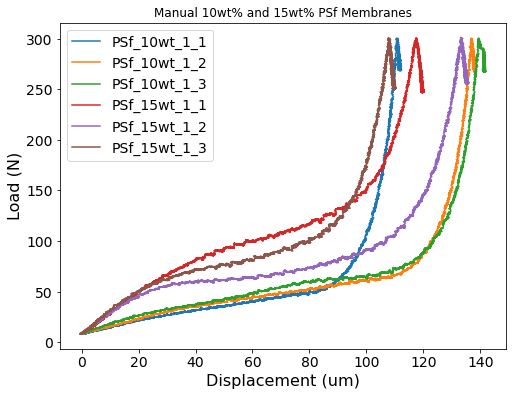

In [14]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 8]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Manual 10wt% and 15wt% PSf Membranes')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Displacement (um)', fontsize = 16)
plt.ylabel('Load (N)', fontsize = 16)
plt.legend(loc='upper left', fontsize= 14)
plt.show()

C:\Users\wang9\AppData\Local\Temp\ipykernel_22112\3772261374.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Normalized displacement (um)'] = data['Normalized displacement (um)'] - data['Normalized displacement (um)'].iloc[0]


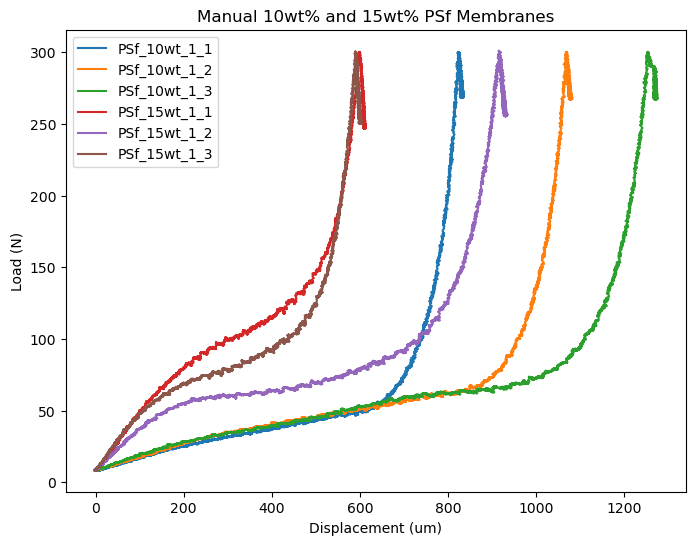

In [39]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 8]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['Normalized displacement (um)'] = data['Normalized displacement (um)'] - data['Normalized displacement (um)'].iloc[0]
    plt.plot(data['Normalized displacement (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Manual 10wt% and 15wt% PSf Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()